## Theory

### Kaiming

Can have uniform or normal distribution (usually uniform); std is proportional to **input connections**. Based on activation slope.

$$ w \in U(-\sigma, \sigma) $$

$$\sigma = \sqrt{\frac{1}{N_{in}}} $$

### Xavier

Can have uniform or normal distribution (usually normal); std is proportional to total input and output connections.

$$ w \in N(0, \sigma^2) $$

$$\sigma^2 = \frac{2}{N_{in} + N_{out}} $$

# Weights Basics

In [1]:
import torch
import torch.nn as nn

## Models

In [2]:
model_1 = nn.Sequential(
    nn.Linear(10,14),
    nn.Linear(14,19),
    nn.Linear(19,8)
)

model_1

Sequential(
  (0): Linear(in_features=10, out_features=14, bias=True)
  (1): Linear(in_features=14, out_features=19, bias=True)
  (2): Linear(in_features=19, out_features=8, bias=True)
)

In [3]:
for i in range(len(model_1)):
  print(model_1[i].weight.shape)

torch.Size([14, 10])
torch.Size([19, 14])
torch.Size([8, 19])


Model with inconsistent weights

In [4]:
model_2 = nn.Sequential(
    nn.Linear(10,14),
    nn.Linear(9,10),
    nn.Linear(11, 5),
)

for i in range(len(model_2)):
  print(model_2[i].weight.shape)

torch.Size([14, 10])
torch.Size([10, 9])
torch.Size([5, 11])


## Test

In [5]:
data = torch.randn(10, 10)
data

tensor([[-0.3483, -0.1102, -0.2232, -0.0842, -1.4928, -1.8010, -0.0160, -1.7129,
          0.4629,  1.6491],
        [ 0.1524,  0.5929, -1.4697,  0.1432,  1.6988, -0.5104,  0.1165,  1.1038,
          0.1961,  0.4436],
        [ 1.4787, -0.6460, -0.2537, -1.1395,  0.4502,  1.0018,  0.6951, -0.2737,
          2.6542, -0.6334],
        [-1.2875, -0.6521, -1.0617, -0.7224, -0.1289,  0.2104,  0.7860, -1.7172,
         -0.2488,  0.2784],
        [ 2.7484, -0.2795, -1.0375, -0.0249,  1.2316, -0.8520,  0.2323, -0.3992,
          1.6727, -0.1882],
        [-0.2975,  0.8468, -0.3581,  0.1513,  0.3905,  0.5679,  0.3392, -1.1202,
          0.3670,  0.3531],
        [-1.5257,  0.1580,  1.2608, -1.3798, -0.6679,  0.1755,  0.2259, -2.7871,
          0.2145,  0.8050],
        [-1.0691, -0.9835,  0.8676,  2.3519, -0.0602, -0.6269, -0.6606, -0.9582,
          0.5722,  0.2982],
        [ 0.6274,  0.1012, -0.8875, -0.2639, -0.5203, -0.8674,  0.4120, -0.2458,
          1.1044,  0.3475],
        [ 0.9393,  

In [6]:
model_1(data)

tensor([[ 0.0865,  0.2103, -0.0353,  0.0973,  0.2861,  0.1057,  0.2896, -0.0993],
        [ 0.3598,  0.1663, -0.2212,  0.0790, -0.0841,  0.1025, -0.1087, -0.0242],
        [ 0.4859,  0.2728, -0.1853,  0.1196,  0.2743, -0.2340,  0.0074,  0.0729],
        [ 0.3081, -0.0277, -0.1566,  0.1908,  0.1243,  0.0623, -0.1691, -0.0437],
        [ 0.4732,  0.0112, -0.3396,  0.2710,  0.0145, -0.1585, -0.0117,  0.1986],
        [ 0.1849,  0.0688, -0.0210,  0.1311,  0.0192,  0.1423,  0.1480, -0.0048],
        [ 0.0164,  0.2696,  0.1886,  0.0097,  0.3309,  0.1839,  0.2939, -0.1921],
        [-0.0922,  0.3089, -0.0930, -0.0106,  0.1595,  0.2828,  0.4577, -0.2433],
        [ 0.2611,  0.1509, -0.1558,  0.1197,  0.1525, -0.0085,  0.1280,  0.0082],
        [ 0.1076, -0.0548, -0.0717,  0.0639,  0.1113,  0.1154,  0.0839,  0.1026]],
       grad_fn=<AddmmBackward0>)

In [7]:
try:
  model_2(data)
except:
  print('Inconsitent Weights')

Inconsitent Weights


# Weights Init

* Models cannot learn if all params (weights and biases) are initiated at the same value.
* If we set e.g. all biases at 0's and all weights ai 1's we'll have a bit better outcome than when all params are same, but still model will perform poorly

In [8]:
import numpy as np
import matplotlib.pyplot as plt

from IPython import display
display.set_matplotlib_formats('svg')

import torch
import torch.nn as nn
import torch.nn.functional as F
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from torch.utils.data import TensorDataset, DataLoader

/tmp/ipython-input-4083439555.py:5: DeprecationWarning: `set_matplotlib_formats` is deprecated since IPython 7.23, directly use `matplotlib_inline.backend_inline.set_matplotlib_formats()`
  display.set_matplotlib_formats('svg')


### Data

In [9]:
data = np.loadtxt(open('/content/sample_data/mnist_train_small.csv', 'rb'), delimiter = ',')

labels = data[:,0]
data = data[:,1:]

labels = torch.tensor(labels, dtype = torch.long)
data = torch.tensor(data, dtype = torch.float)

# normalization
data_norm = data / torch.max(data)

### Split

In [10]:
train_data, test_data, train_labels, test_labels = train_test_split(data_norm, labels, test_size = .2)

train_dataset = TensorDataset(train_data, train_labels)
test_dataset = TensorDataset(test_data, test_labels)

batch_size = 64
train_dataloader = DataLoader(train_dataset, batch_size = batch_size, shuffle = True)
test_dataloader = DataLoader(test_dataset, batch_size = test_data.shape[0])

### Model

In [11]:
def CreateNet():

  class Net(nn.Module):
    def __init__(self):
      super().__init__()

      self.input = nn.Linear(784, 128)

      self.fc1 = nn.Linear(128,64)
      self.fc2 = nn.Linear(64,64)

      self.output = nn.Linear(64,10)

    def forward(self, x):
      x = F.relu(self.input(x))
      x = F.relu(self.fc1(x))
      x = F.relu(self.fc2(x))
      x = self.output(x)
      return torch.log_softmax(x, axis = 1)

  net = Net()
  loss_fn = nn.NLLLoss()
  optimizer = torch.optim.SGD(net.parameters(), lr = 0.01)
  return net, loss_fn, optimizer

CreateNet()

(Net(
   (input): Linear(in_features=784, out_features=128, bias=True)
   (fc1): Linear(in_features=128, out_features=64, bias=True)
   (fc2): Linear(in_features=64, out_features=64, bias=True)
   (output): Linear(in_features=64, out_features=10, bias=True)
 ),
 NLLLoss(),
 SGD (
 Parameter Group 0
     dampening: 0
     differentiable: False
     foreach: None
     fused: None
     lr: 0.01
     maximize: False
     momentum: 0
     nesterov: False
     weight_decay: 0
 ))

In [12]:
net, loss_fn, optimizer = CreateNet()
X, y = next(iter(train_dataloader))
y_hat = net(X)
loss = loss_fn(y_hat, y)
acc = 100 * torch.mean(
    (torch.argmax(y_hat, axis = 1) == y).float()
)
print(f'First spin Accuracy: {acc}% ')

First spin Accuracy: 4.6875% 


## Train

In [13]:
def ModelTrain(net, loss_fn, optimizer, epochs, verbose):

  losses = torch.zeros(epochs)
  train_accs = []
  test_accs = []

  for epoch in range(epochs):
    net.train()

    batch_acc = []
    batch_loss = []

    for X, y in train_dataloader:

      y_hat = net(X)
      loss = loss_fn(y_hat, y)

      # backprop
      optimizer.zero_grad()
      loss.backward()
      optimizer.step()

      # loss from this batch
      batch_loss.append(loss.item())

      # compute accuracy
      matches = torch.argmax(y_hat, axis = 1) == y
      matches_numeric = matches.float()
      accuracy_pct = 100 * torch.mean(matches_numeric)
      batch_acc.append(accuracy_pct)
    # end of batch loop

    #training accuracy
    train_acc = np.mean(batch_acc)
    train_accs.append(train_acc)

    # and get  avg losses
    losses[epoch] = np.mean(batch_loss)

    # test accuracy
    net.eval()
    X, y = next(iter(test_dataloader))
    with torch.no_grad(): # deactivates autograd
      y_hat = net(X)

    test_acc = 100 * torch.mean((torch.argmax(y_hat, axis = 1) == y).float())
    test_accs.append(test_acc)
  # end epochs

    if verbose and epoch%10 == 0:
      print(f'Epoch: {epoch} | Train Acc: {train_acc:.2f} | Test Acc: {test_acc:.2f} | Loss: {losses[epoch]:.2f}')

  return train_accs, test_accs, losses, net

In [14]:
EPOCHS = 30

## Runs

### Default Init

In [15]:
net, loss_fn, optimizer = CreateNet()

In [16]:
default_train_acc, default_test_acc, default_losses, default_model = ModelTrain(net, loss_fn, optimizer, EPOCHS, verbose = True)

Epoch: 0 | Train Acc: 13.26 | Test Acc: 20.23 | Loss: 2.30
Epoch: 10 | Train Acc: 87.44 | Test Acc: 87.08 | Loss: 0.45
Epoch: 20 | Train Acc: 91.78 | Test Acc: 90.70 | Loss: 0.29


### First Layer Zeros Init

In [17]:
net, loss_fn, optimizer = CreateNet()

Change 1st layers weights to zeros

In [18]:
net.fc1.weight.data = torch.zeros_like(net.fc1.weight)
net.fc1.weight.data

tensor([[0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        ...,
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.]])

In [19]:
first_l_zeros_train_acc, first_l_zeros_test_acc, first_l_zeros_losses, first_l_zeros_model = ModelTrain(net, loss_fn, optimizer, EPOCHS, verbose = True)

Epoch: 0 | Train Acc: 10.61 | Test Acc: 10.70 | Loss: 2.30
Epoch: 10 | Train Acc: 47.97 | Test Acc: 55.15 | Loss: 1.65
Epoch: 20 | Train Acc: 86.96 | Test Acc: 87.20 | Loss: 0.46


### All Layers Zeros Init

In [20]:
net, loss_fn, optimizer = CreateNet()

Change all layers weights to zeros

In [21]:
for layer in net.named_parameters():
  layer[1].data = torch.zeros_like(layer[1].data)

In [22]:
all_l_zeros_train_acc, all_l_zeros_test_acc, all_l_zeros_losses, all_l_zeros_model = ModelTrain(net, loss_fn, optimizer, EPOCHS, verbose = True)

Epoch: 0 | Train Acc: 11.23 | Test Acc: 11.12 | Loss: 2.30
Epoch: 10 | Train Acc: 11.24 | Test Acc: 11.12 | Loss: 2.30
Epoch: 20 | Train Acc: 11.24 | Test Acc: 11.12 | Loss: 2.30


### First Layer Ones Init

In [23]:
net, loss_fn, optimizer = CreateNet()

Change 1st layer weights to ones

In [24]:
net.fc1.weight.data = torch.ones_like(net.fc1.weight)
net.fc1.weight.data

tensor([[1., 1., 1.,  ..., 1., 1., 1.],
        [1., 1., 1.,  ..., 1., 1., 1.],
        [1., 1., 1.,  ..., 1., 1., 1.],
        ...,
        [1., 1., 1.,  ..., 1., 1., 1.],
        [1., 1., 1.,  ..., 1., 1., 1.],
        [1., 1., 1.,  ..., 1., 1., 1.]])

In [25]:
first_l_ones_train_acc, firs_l_ones_test_acc, first_l_ones_losses, first_l_ones_model = ModelTrain(net, loss_fn, optimizer, EPOCHS, verbose = True)

Epoch: 0 | Train Acc: 16.45 | Test Acc: 22.73 | Loss: 2.12
Epoch: 10 | Train Acc: 50.51 | Test Acc: 49.65 | Loss: 1.22
Epoch: 20 | Train Acc: 67.56 | Test Acc: 65.90 | Loss: 0.77


### All Layers Ones Init

In [26]:
net, loss_fn, optimizer = CreateNet()

Change all layers weights to ones

In [27]:
for layer in net.named_parameters():
  layer[1].data = torch.ones_like(layer[1].data)

In [28]:
all_l_ones_train_acc, all_l_ones_test_acc, all_l_ones_losses, all_l_ones_model = ModelTrain(net, loss_fn, optimizer, EPOCHS, verbose = True)

Epoch: 0 | Train Acc: 11.16 | Test Acc: 11.12 | Loss: 92348496.00
Epoch: 10 | Train Acc: 11.24 | Test Acc: 11.12 | Loss: 2.30
Epoch: 20 | Train Acc: 11.24 | Test Acc: 11.12 | Loss: 2.30


## Plots

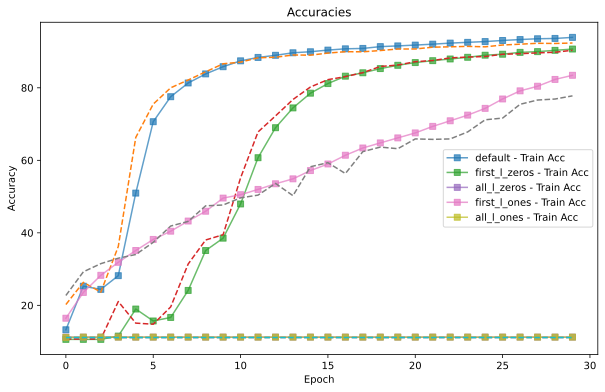

In [29]:
fig = plt.figure(figsize = (10,6))

default = [default_train_acc, default_test_acc, default_losses, default_model]
first_l_zeros = [first_l_zeros_train_acc, first_l_zeros_test_acc, first_l_zeros_losses, first_l_zeros_model]
all_l_zeros = [all_l_zeros_train_acc, all_l_zeros_test_acc, all_l_zeros_losses, all_l_zeros_model]
first_l_ones = [first_l_ones_train_acc, firs_l_ones_test_acc, first_l_ones_losses, first_l_ones_model]
all_l_ones = [all_l_ones_train_acc, all_l_ones_test_acc, all_l_ones_losses, all_l_ones_model]

all = [default, first_l_zeros, all_l_zeros, first_l_ones, all_l_ones]
names = ['default', 'first_l_zeros', 'all_l_zeros', 'first_l_ones', 'all_l_ones']

for mode, name in zip(all, names):
  plt.plot(mode[0], '-s', label = f'{name} - Train Acc', alpha=.7)
  plt.plot(mode[1], '--')

plt.title('Accuracies')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

As we can see if we set all weights in first layer to either ones or zeroes we still achieve same level of accuracy as in default weights initialization. Of course models with first layer "flat" will be trained slower.

Problem is when all weights are either zeroes or ones in all layers. Those models, don't move at all.

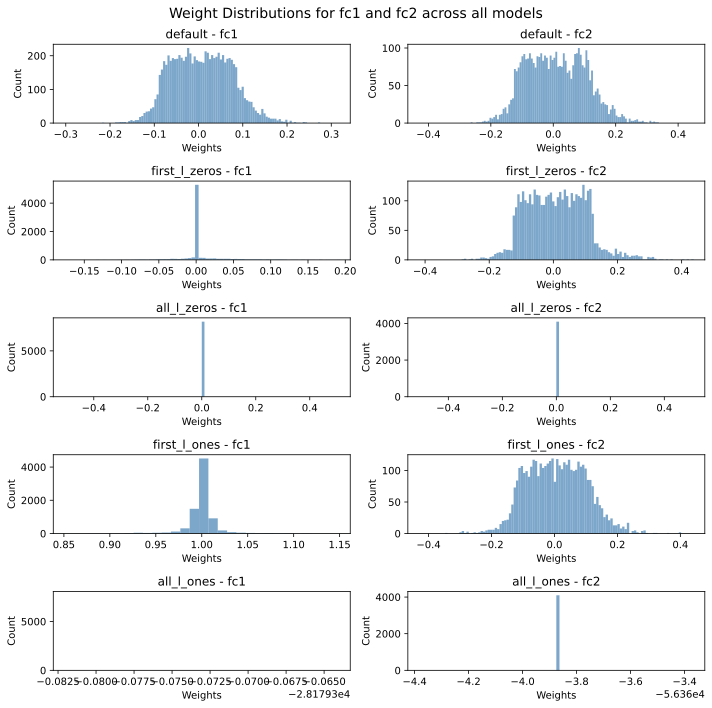

In [30]:
import matplotlib.pyplot as plt

layers = ['fc1', 'fc2']
all_models = [default, first_l_zeros, all_l_zeros, first_l_ones, all_l_ones]
names = ['default', 'first_l_zeros', 'all_l_zeros', 'first_l_ones', 'all_l_ones']

fig, axes = plt.subplots(len(all_models), len(layers), figsize=(10, 10))

for i, (name, mode) in enumerate(zip(names, all_models)):
    model = mode[3]
    for j, layer in enumerate(layers):
        w = getattr(model, layer).weight.data.cpu().numpy().flatten()
        axes[i, j].hist(w, bins=100, alpha=0.7, color='steelblue')
        axes[i, j].set_title(f"{name} - {layer}")
        axes[i, j].set_xlabel('Weights')
        axes[i, j].set_ylabel('Count')
        mean, std = w.mean(), w.std()
        if std > 1e-6:
            axes[i, j].set_xlim(mean - 5 * std, mean + 5 * std)

plt.suptitle("Weight Distributions for fc1 and fc2 across all models", fontsize=14)
plt.tight_layout()
plt.show()


* If sll weights are the same, it's like a flat surface. When we have diversity of weights its like mountains. Whenever we want to go down, (i.e. e.g. SGD) on flat surface we wouldn't have idea where to go. On the contrary we would know where to go on the mountains.
* With random weights some will be strenghten, some will be weakened, some by a lot some by a little.
* Equal wieghts is called "weight symmetry", thus randomizing weights is "breaking symmetry"
* Standard Deviation of random weights should be rather small.
* With too small weights we risk vanishing gradients, with too large weights we risk expolding gradeints
* **Best rule: Set the variance of the weights proportional to the size of the network**
* Initializing biases is less important